In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
# from datasets import load_dataset

In [3]:
checkpoints = ["00500", "05000", "10000", "15000", "20000", "25000", "30000", "35000", "40000", "45000", "50000"]
likelihoods_all = []
for checkpoint in checkpoints:
    model_path = f"ckpts/sft_gsm8k_llama7B_full3/checkpoint_{checkpoint}/hf_model/"
    likelihoods = np.load(os.path.join(model_path, "trainpts_answer_log_probs_mean_all2.npy"))
    # likelihoods = likelihoods*train_question_lens
    likelihoods = np.e ** likelihoods
    likelihoods_all.append(likelihoods)
    print(likelihoods.mean())
likelihoods_all = np.array(likelihoods_all)

0.5986104
0.6795229
0.7026185
0.7123671
0.7132159
0.7182645
0.724342
0.70159554
0.715343
0.72587574
0.7170329


In [8]:
answer_types_all = np.load("ckpts/sft_gsm8k_llama7B_full3/checkpoint_10000/hf_model/train_answer_types_all100.npy")
num_correct_generations = (answer_types_all==0).sum(axis=-1)

answer_types_all2 = np.load("llama7B_GSM8k_train_answer_types_all100.npy")
num_correct_generations2 = (answer_types_all2==0).sum(axis=-1)

answer_types_all3 = np.load("llama7B_GSM8k_train_answer_types_all12_spacing2.npy")
num_correct_generations3 = (answer_types_all3==0).sum(axis=-1)

In [9]:
answer_types_all3

array([[0, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 1]])

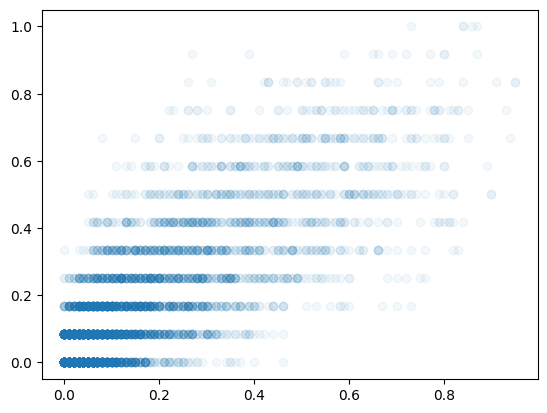

In [13]:
plt.scatter(num_correct_generations2/100, num_correct_generations3/12, alpha=0.05)

In [16]:
 np.log(num_correct_generations3+1)

array([2.39789527, 0.        , 0.        , ..., 0.69314718, 0.        ,
       0.        ])

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/data/katie_kang/miniconda3/envs/trlx2/

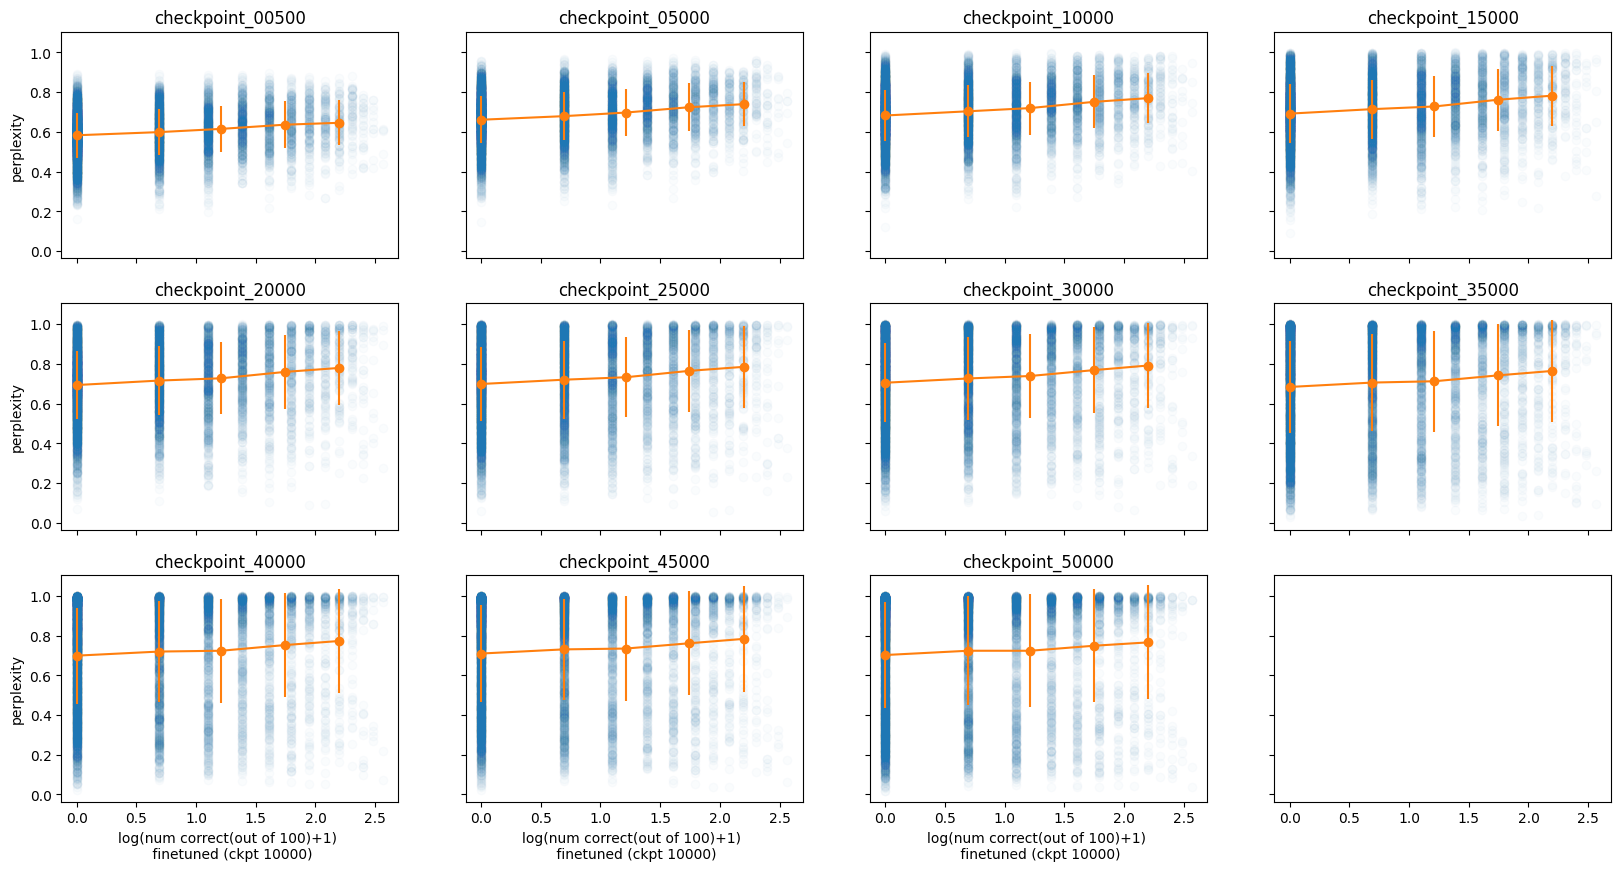

In [17]:
# make 12 subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 10), sharex=True, sharey=True)

for likelihood_idx in range(11):
    x_axis_values = np.log(num_correct_generations3+1)
    y_axis_values = likelihoods_all[likelihood_idx]
    
    i = likelihood_idx // 4
    j = likelihood_idx % 4

    axs[i][j].scatter(x_axis_values, y_axis_values, alpha=0.02)
    bins = [0, 0.5, 1, 1.5, 2, 2.5, 2]
    means0 = []
    means = []
    stds = []
    for k in range(len(bins)-1):
        idxs = np.where((x_axis_values >= bins[k]) & (x_axis_values < bins[k+1]))[0]
        mean = np.mean(y_axis_values[idxs])
        std = np.std(y_axis_values[idxs]) 
        means.append(mean)
        stds.append(std)
        means0.append(np.mean(x_axis_values[idxs]))
        
    axs[i][j].errorbar(means0, means, yerr=stds, fmt='o-', color = "C1")
    axs[i][j].set_title(f"checkpoint_{checkpoints[likelihood_idx]}")

    if j == 0:
        axs[i][j].set_ylabel("perplexity" )
    if i == 2:
        axs[i][j].set_xlabel("log(num correct(out of 100)+1) \n finetuned (ckpt 10000)" )
    # plt.title("GSM8K")